In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_csv('TSLA.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [5]:
#investigate which column has missing value
nulls = df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False).to_frame().rename(columns={0: "MissingVals"})
nulls["MissingValsPct"] = nulls["MissingVals"] / len(df)
nulls

,MissingVals,MissingValsPct


In [6]:
0.8*2416

1932.8000000000002

In [7]:
0.2*2416

483.20000000000005

In [8]:
train = df[:1934]

In [9]:
train 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
1929,2018-02-27,356.250000,359.989990,350.010010,350.989990,350.989990,4797400
1930,2018-02-28,352.570007,355.239990,342.220001,343.059998,343.059998,6069700
1931,2018-03-01,345.010010,348.670013,330.070007,330.929993,330.929993,6885600
1932,2018-03-02,326.980011,335.220001,322.970001,335.119995,335.119995,5092800


In [10]:
test = df[1934:]

In [11]:
test

,Date,Open,High,Low,Close,Adj Close,Volume
1934,2018-03-06,333.750000,336.369995,327.029999,328.200012,328.200012,4285700
1935,2018-03-07,325.440002,332.500000,321.739990,332.299988,332.299988,5007300
1936,2018-03-08,332.859985,333.299988,326.269989,329.100006,329.100006,3566200
1937,2018-03-09,324.100006,328.489990,322.369995,327.170013,327.170013,5506800
1938,2018-03-12,328.609985,347.209991,326.500000,345.510010,345.510010,8264000
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [12]:
type(train)

pandas.core.frame.DataFrame

In [13]:
train = train.iloc[:,1:2].values

In [14]:
train

array([[ 19.      ],
       [ 25.790001],
       [ 25.      ],
       ...,
       [345.01001 ],
       [326.980011],
       [332.390015]])

In [15]:
type(train)

numpy.ndarray

In [16]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train)

In [17]:
training_set_scaled

array([[0.00771826],
       [0.02604237],
       [0.02391041],
       ...,
       [0.88751858],
       [0.83886118],
       [0.85346111]])

In [18]:
type(training_set_scaled)

numpy.ndarray

# Building the Time Stamp


The specified number of time steps defines the number of input variables (X) used to predict the next time step (y). As such, for each time step used in the representation, that many rows must be removed from the beginning of the dataset. This is because there are no prior observations to use as time steps for the first values in the dataset.

In [19]:
# Creating a data structure with 20 (working days in 1 month) timesteps and 1 output
X_train1 = []
y_train1 = []
for i in range(20, 1934):
    X_train1.append(training_set_scaled[i-20:i, 0])
    y_train1.append(training_set_scaled[i, 0])
X_train1, y_train1 = np.array(X_train1), np.array(y_train1)

In [20]:
# Creating a data structure with 60 (working days in 3 months) timesteps and 1 output
X_train3 = []
y_train3 = []
for i in range(60, 1934):
    X_train3.append(training_set_scaled[i-60:i, 0])
    y_train3.append(training_set_scaled[i, 0])
X_train3, y_train3 = np.array(X_train3), np.array(y_train3)

In [21]:
# Creating a data structure with 120 (working days in 6 months) timesteps and 1 output
X_train6 = []
y_train6 = []
for i in range(100, 1934):
    X_train6.append(training_set_scaled[i-100:i, 0])
    y_train6.append(training_set_scaled[i, 0])
X_train6, y_train6 = np.array(X_train6), np.array(y_train6)

In [22]:
# Reshaping 1 month 
X_train1 = np.reshape(X_train1, (X_train1.shape[0], X_train1.shape[1], 1))

In [23]:
# Reshaping 3 month 
X_train3 = np.reshape(X_train3, (X_train3.shape[0], X_train3.shape[1], 1))

In [24]:
# Reshaping 6 month
X_train6 = np.reshape(X_train6, (X_train6.shape[0], X_train6.shape[1], 1))

# BUILDING THE MODEL

In [25]:
import tensorflow as tf 

In [26]:
import keras

Using TensorFlow backend.


In [27]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Building using the first month only 

In [28]:
# Initialising the RNN
regressor = Sequential()

In [29]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train1.shape[1], 1)))
regressor.add(Dropout(0.2))

In [30]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [31]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [32]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [33]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [34]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [35]:
# Fitting the RNN to the Training set
regressor.fit(X_train1, y_train1, epochs = 100, batch_size = 32)

Epoch 1/100
1914/1914 [==============================] - 17s 9ms/step - loss: 0.0262
Epoch 2/100
1914/1914 [==============================] - 11s 6ms/step - loss: 0.0044
Epoch 3/100
1914/1914 [==============================] - 10s 5ms/step - loss: 0.0039
Epoch 4/100
1914/1914 [==============================] - 11s 6ms/step - loss: 0.0038
Epoch 5/100
1914/1914 [==============================] - 11s 6ms/step - loss: 0.0037
Epoch 6/100
1914/1914 [==============================] - 11s 6ms/step - loss: 0.0034
Epoch 7/100
1914/1914 [==============================] - 11s 6ms/step - loss: 0.0033
Epoch 8/100
1914/1914 [==============================] - 11s 6ms/step - loss: 0.0034
Epoch 9/100
1914/1914 [==============================] - 11s 6ms/step - loss: 0.0035
Epoch 10/100
1914/1914 [==============================] - 11s 6ms/step - loss: 0.0033
Epoch 11/100
1914/1914 [==============================] - 11s 6ms/step - loss: 0.0032
Epoch 12/100
1914/1914 [==============================] - 11s 6

BUILDING using 3 Months 

In [36]:
# Initialising the RNN
regressor3 = Sequential()

In [37]:
# Adding the first LSTM layer and some Dropout regularisation
regressor3.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train3.shape[1], 1)))
regressor3.add(Dropout(0.2))

In [38]:
# Adding a second LSTM layer and some Dropout regularisation
regressor3.add(LSTM(units = 50, return_sequences = True))
regressor3.add(Dropout(0.2))

In [39]:
# Adding a third LSTM layer and some Dropout regularisation
regressor3.add(LSTM(units = 50, return_sequences = True))
regressor3.add(Dropout(0.2))

In [40]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor3.add(LSTM(units = 50))
regressor3.add(Dropout(0.2))

In [41]:
# Adding the output layer
regressor3.add(Dense(units = 1))

In [42]:
# Compiling the RNN
regressor3.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [43]:
# Fitting the RNN to the Training set
regressor3.fit(X_train3, y_train3, epochs = 100, batch_size = 32)

Epoch 1/100
1874/1874 [==============================] - 42s 22ms/step - loss: 0.0213
Epoch 2/100
1874/1874 [==============================] - 31s 17ms/step - loss: 0.0053
Epoch 3/100
1874/1874 [==============================] - 30s 16ms/step - loss: 0.0047
Epoch 4/100
1874/1874 [==============================] - 30s 16ms/step - loss: 0.0038
Epoch 5/100
1874/1874 [==============================] - 30s 16ms/step - loss: 0.0041
Epoch 6/100
1874/1874 [==============================] - 31s 16ms/step - loss: 0.0042
Epoch 7/100
1874/1874 [==============================] - 31s 16ms/step - loss: 0.0035
Epoch 8/100
1874/1874 [==============================] - 30s 16ms/step - loss: 0.0038
Epoch 9/100
1874/1874 [==============================] - 30s 16ms/step - loss: 0.0034
Epoch 10/100
1874/1874 [==============================] - 30s 16ms/step - loss: 0.0033
Epoch 11/100
1874/1874 [==============================] - 32s 17ms/step - loss: 0.0033
Epoch 12/100
1874/1874 [============================

Building using 6 months 

In [44]:
# Initialising the RNN
regressor6 = Sequential()

In [45]:
# Adding the first LSTM layer and some Dropout regularisation
regressor6.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train6.shape[1], 1)))
regressor6.add(Dropout(0.2))

In [46]:
# Adding a second LSTM layer and some Dropout regularisation
regressor6.add(LSTM(units = 50, return_sequences = True))
regressor6.add(Dropout(0.2))

In [47]:
# Adding a third LSTM layer and some Dropout regularisation
regressor6.add(LSTM(units = 50, return_sequences = True))
regressor6.add(Dropout(0.2))

In [48]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor6.add(LSTM(units = 50))
regressor6.add(Dropout(0.2))

In [49]:
# Adding the output layer
regressor6.add(Dense(units = 1))

In [50]:
# Compiling the RNN
regressor6.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [51]:
# Fitting the RNN to the Training set
regressor6.fit(X_train6, y_train6, epochs = 100, batch_size = 32)

KeyboardInterrupt: 

# Making the predictions and visualising the results

In [53]:
# Getting the test dataset
test = test.iloc[:,1:2].values

In [54]:
test

array([[333.75    ],
       [325.440002],
       [332.859985],
       [324.100006],
       [328.609985],
       [328.609985],
       [336.76001 ],
       [329.380005],
       [322.929993],
       [316.5     ],
       [314.869995],
       [310.25    ],
       [313.890015],
       [311.25    ],
       [307.339996],
       [304.      ],
       [264.579987],
       [256.48999 ],
       [256.26001 ],
       [269.820007],
       [252.779999],
       [289.339996],
       [301.      ],
       [300.369995],
       [298.970001],
       [300.73999 ],
       [302.320007],
       [303.600006],
       [299.      ],
       [288.869995],
       [291.079987],
       [291.079987],
       [295.170013],
       [291.290009],
       [285.      ],
       [283.5     ],
       [278.75    ],
       [285.369995],
       [293.609985],
       [293.51001 ],
       [298.570007],
       [278.790009],
       [283.      ],
       [297.5     ],
       [300.799988],
       [300.410004],
       [307.5     ],
       [307.7

In [62]:
df = df['Open']

In [63]:
df

0        19.000000
1        25.790001
2        25.000000
3        23.000000
4        20.000000
           ...    
2411    568.489990
2412    575.690002
2413    632.419983
2414    640.000000
2415    673.690002
Name: Open, Length: 2416, dtype: float64

In [60]:
test 

array([[333.75    ],
       [325.440002],
       [332.859985],
       [324.100006],
       [328.609985],
       [328.609985],
       [336.76001 ],
       [329.380005],
       [322.929993],
       [316.5     ],
       [314.869995],
       [310.25    ],
       [313.890015],
       [311.25    ],
       [307.339996],
       [304.      ],
       [264.579987],
       [256.48999 ],
       [256.26001 ],
       [269.820007],
       [252.779999],
       [289.339996],
       [301.      ],
       [300.369995],
       [298.970001],
       [300.73999 ],
       [302.320007],
       [303.600006],
       [299.      ],
       [288.869995],
       [291.079987],
       [291.079987],
       [295.170013],
       [291.290009],
       [285.      ],
       [283.5     ],
       [278.75    ],
       [285.369995],
       [293.609985],
       [293.51001 ],
       [298.570007],
       [278.790009],
       [283.      ],
       [297.5     ],
       [300.799988],
       [300.410004],
       [307.5     ],
       [307.7

In [64]:
df

0        19.000000
1        25.790001
2        25.000000
3        23.000000
4        20.000000
           ...    
2411    568.489990
2412    575.690002
2413    632.419983
2414    640.000000
2415    673.690002
Name: Open, Length: 2416, dtype: float64

1 month 

In [65]:
inputs = df[len(df) - len(test) - 30:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

3 months

In [67]:
inputs = df[len(df) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [70]:
X_test1 = []
for i in range(30, 513):
    X_test1.append(inputs[i-20:i, 0])
X_test1 = np.array(X_test1)
X_test1 = np.reshape(X_test1, (X_test1.shape[0], X_test1.shape[1], 1))
predicted_stock_price1 = regressor.predict(X_test1)
predicted_stock_price1 = sc.inverse_transform(predicted_stock_price1)

In [72]:
X_test3 = []
for i in range(60, 543):
    X_test3.append(inputs[i-60:i, 0])
X_test3 = np.array(X_test3)
X_test3 = np.reshape(X_test3, (X_test3.shape[0], X_test3.shape[1], 1))
predicted_stock_price3 = regressor3.predict(X_test3)
predicted_stock_price3 = sc.inverse_transform(predicted_stock_price3)

# Visualization 

In [74]:
import matplotlib.pyplot as plt

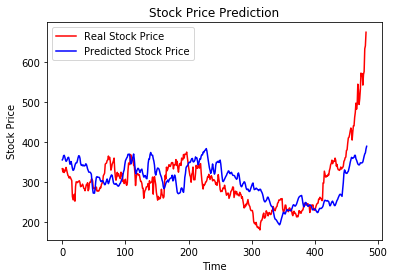

In [75]:
plt.plot(test, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price1, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

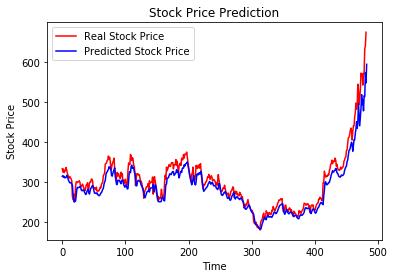

In [77]:
plt.plot(test, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price3, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()